In [2]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
bg_full = pd.read_excel("C:/Users/User/Documents/UNITN/Computational social science/bulgaria/full_table.xlsx")
bg_full

,Region,unis_colleges_number,teaching_staff,students_enrolled,graduates_uni,ratio_grad_enrolled_unis,employees_laborcontract_avg,avgwage,foreign_direct_investment_euro,activity_rate,...,schools_14,schools_57,schools_812,gradtotot57,gradtotot812,accommodation_establishments,arrivals_accommodation,revenue_accomm_lev,crimes,fertility_rate
0,Total,54,20695.00,220439.0,46135.00,0.209287,NaN,NaN,26884352.0,72.0,...,1 956,9 162,5 346,0.299043,0.195569,3335,5647634,1071711253,28727,1.577632
1,Severna i Yugoiztochna Bulgaria,17,6609.00,78184.0,17317.00,0.221490,NaN,NaN,NaN,NaN,...,NaN,4 575,2 386,0.299915,0.203141,2064,3316689,774656330,16262,NaN
2,Severozapaden,2,802.00,5505.0,805.00,0.146231,164011.0,13121.0,678528.3,67.1,...,260,989,496,0.298262,0.224317,169,244881,23068903,3984,1.728416
3,Vidin,0,9.00,453.0,69.00,0.152318,15333.0,11253.0,79389.7,69.0,...,28,105,58,0.334521,0.215301,24,26673,2219987,393,1.651371
4,Vratsa,0,187.00,1223.0,184.00,0.150450,36189.0,15537.0,121983.8,65.2,...,58,221,92,0.301114,0.331230,27,32981,2412077,1047,1.756014
5,Lovech,0,31.00,152.0,40.00,0.263158,30310.0,12594.0,139125.1,69.0,...,47,167,81,0.303146,0.290405,72,118120,12793079,724,1.883389
6,Montana,0,160.40,1101.0,161.00,0.141034,26624.0,12487.0,36326.8,63.4,...,48,174,80,0.303222,0.186837,23,29679,2330266,767,1.725735
7,Pleven,2,575.00,3677.0,512.00,0.139244,55555.0,12660.0,301702.9,69.0,...,79,322,185,0.280641,0.156205,23,37428,3313494,1053,1.660508
8,Severen tsentralen,5,1826.00,26763.0,6641.00,0.248141,207401.0,13330.0,1136615.3,71.4,...,223,953,495,0.306386,0.206312,279,343094,25661213,3410,1.432934
9,Veliko Tarnovo,3,1149.00,15725.0,4604.00,0.292782,62535.0,13008.0,92723.8,75.0,...,67,280,152,0.306041,0.222126,117,144312,10532771,868,1.349798


In [17]:
bg_cities = bg_full.drop([0,1,2,8,14,19,24,25,31], axis = 0)
bg_cities.to_csv("C:/Users/User/Documents/UNITN/Computational social science/bulgaria/only_cities.csv")
#bg_cities_x = bg_cities.drop("Region", axis = 1)

In [26]:
only_cities = pd.read_csv("C:/Users/User/Documents/UNITN/Computational social science/bulgaria/scaled_full_table.csv")
only_cities = only_cities.drop(only_cities.columns[0], axis = 1)

In [34]:
only_cities_X = only_cities.drop(only_cities.columns[[22, 23, 24,25]], axis = 1)
only_cities_y_list = [only_cities["labs_hc3"], only_cities["labs_hc4"], only_cities["labs_hc5"]]
only_cities_X
only_cities_y_list

[0     1
 1     1
 2     1
 3     1
 4     1
 5     1
 6     1
 7     1
 8     1
 9     1
 10    2
 11    1
 12    1
 13    1
 14    2
 15    1
 16    1
 17    1
 18    1
 19    1
 20    1
 21    1
 22    3
 23    1
 24    1
 25    2
 26    1
 27    1
 Name: labs_hc3, dtype: int64,
 0     1
 1     1
 2     1
 3     1
 4     1
 5     1
 6     1
 7     1
 8     1
 9     1
 10    2
 11    1
 12    1
 13    1
 14    3
 15    1
 16    1
 17    1
 18    1
 19    1
 20    1
 21    1
 22    4
 23    1
 24    1
 25    2
 26    1
 27    1
 Name: labs_hc4, dtype: int64,
 0     1
 1     2
 2     2
 3     1
 4     1
 5     1
 6     1
 7     1
 8     1
 9     1
 10    3
 11    1
 12    1
 13    1
 14    4
 15    2
 16    1
 17    1
 18    1
 19    1
 20    1
 21    1
 22    5
 23    1
 24    1
 25    3
 26    2
 27    1
 Name: labs_hc5, dtype: int64]

In [97]:
tsne = TSNE(n_components=2, perplexity=0.005, n_iter=300)
tsne_results = tsne.fit_transform(only_cities_X)

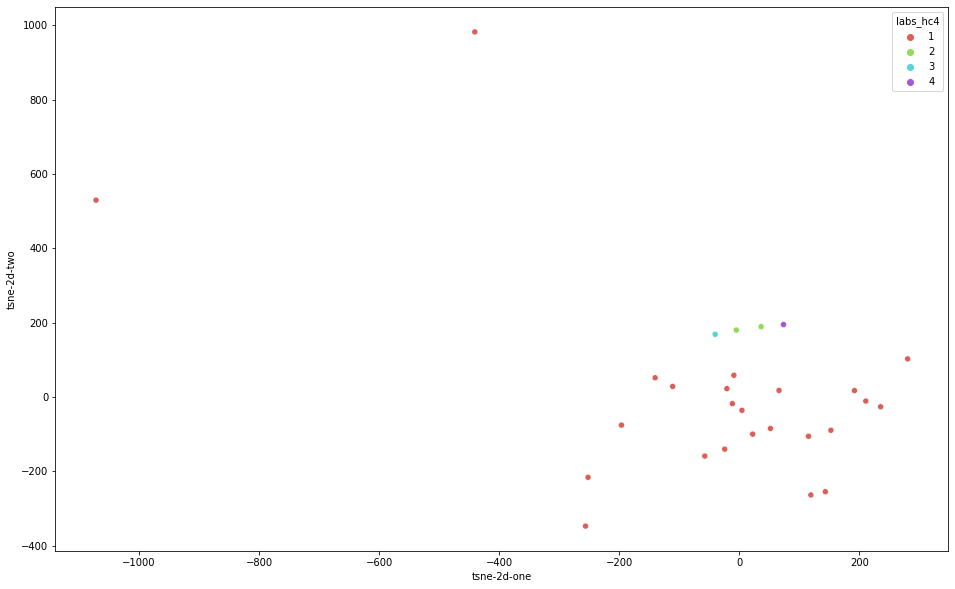

In [98]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]

plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue= only_cities_y_list[1],
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=1
)

plt.show()

# PCA

In [99]:
from sklearn.decomposition import PCA

df = pd.DataFrame()
# instantiate a PCA object
pca = PCA(n_components=10)
# compute PCA and transform the data
pca_result = pca.fit_transform(only_cities_X)
# save to dataframe
df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1] 
df['pca-three'] = pca_result[:, 2]
df['pca-four'] = pca_result[:, 3]
df['pca-five'] = pca_result[:, 4]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.5781817  0.12054457 0.0789496  0.07294799 0.04869279 0.03815357
 0.01899991 0.01537836 0.01322768 0.00623268]


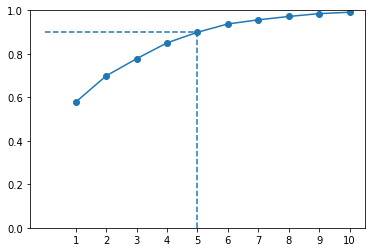

In [109]:
plt.plot(range(1, 11), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = "-")
plt.ylim(0, 1)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.vlines(5, 0, pca.explained_variance_ratio_.cumsum()[4], linestyle = "--")
plt.hlines(pca.explained_variance_ratio_.cumsum()[4],0, 5, linestyle = "--")

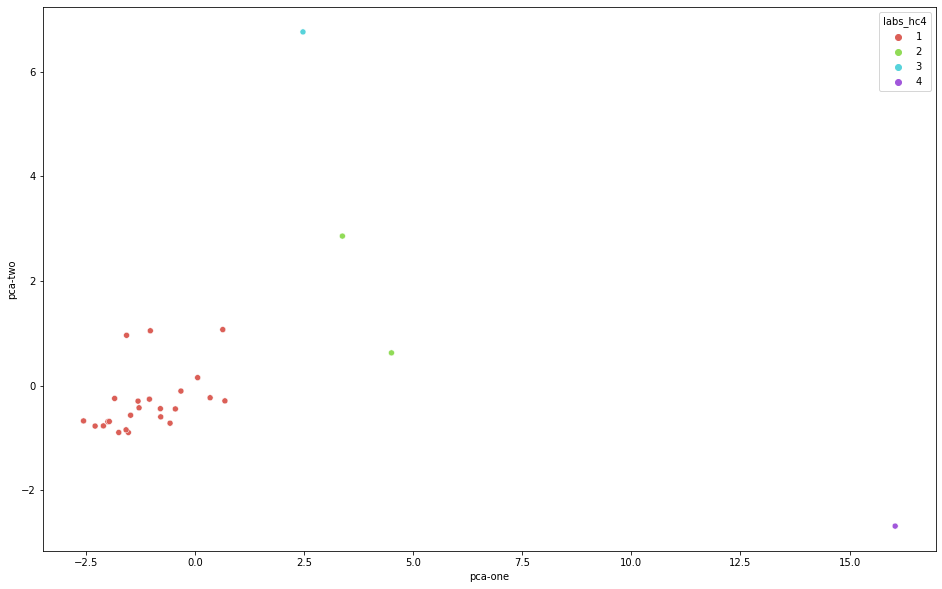

In [68]:
plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=only_cities_y_list[1],
    palette=sns.color_palette("hls", 4),
    data=df,
    legend="full",
)

plt.show()

Better job, show this one

# UMAP 

In [51]:
import umap

In [73]:
tf = umap.UMAP(n_neighbors=3, random_state=42).fit(only_cities_X)

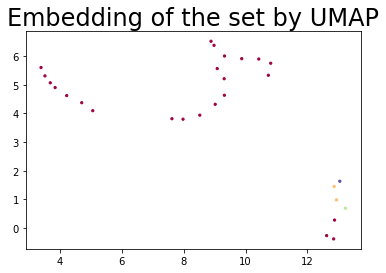

In [74]:
plt.scatter(tf.embedding_[:, 0], tf.embedding_[:, 1], s=5, c=only_cities_y_list[1], cmap='Spectral')
plt.title('Embedding of the set by UMAP', fontsize=24);

# TSNE new

In [4]:
bul_with_labs = pd.read_csv("C:/Users/User/Documents/UNITN/Computational social science/bulgaria/bul_with_labels.csv")
#bul_with_labs

In [5]:
bul_with_labs_X = bul_with_labs.drop(["kmeans4", "labs_pca_hc4", "Region", "Unnamed: 0" ],axis = 1)
bul_with_labs_Yk4 = bul_with_labs.kmeans4
bul_with_labs_Yhc4 = bul_with_labs.labs_pca_hc4

In [29]:
tsne = TSNE(n_components=2, perplexity=2.5, n_iter=300)
tsne_results = tsne.fit_transform(bul_with_labs_X)

In [11]:
#bul_with_labs.kmeans4

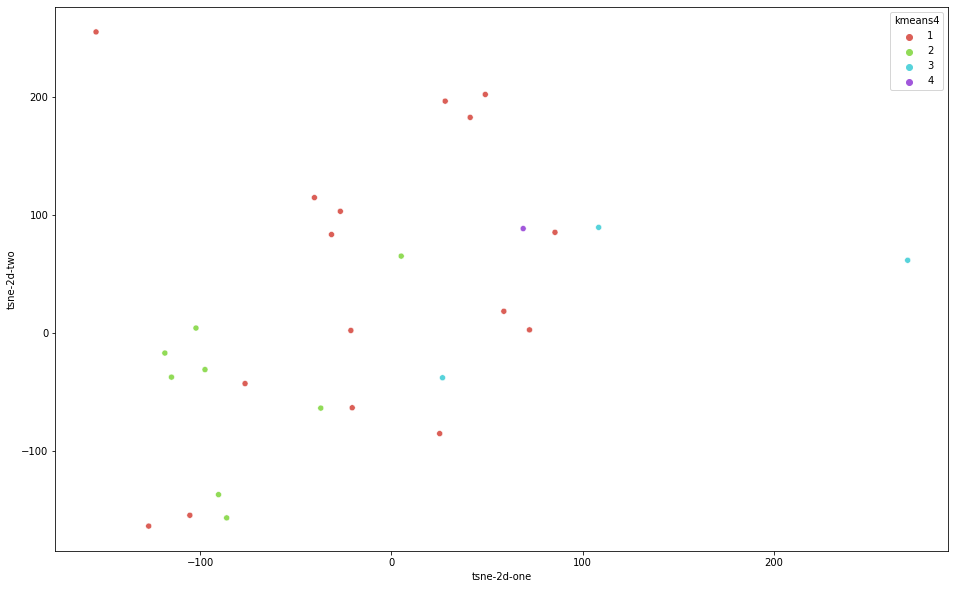

In [30]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]

plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue= bul_with_labs.kmeans4,
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=1
)

plt.show()

In [8]:
bul_with_labs.columns

Index(['Unnamed: 0', 'Region', 'Population2021', 'fertility_rate',
       'unis_colleges_number', 'teaching_staff', 'students_enrolled',
       'graduates_uni', 'ratio_grad_enrolled_unis', 'TotalSchools',
       'gradtotot57', 'gradtotot812', 'employees_laborcontract_avg',
       'employees_laborcontract_avg_topop', 'avgwage', 'activity_rate',
       'labour_force_thousands', 'employment_rate',
       'foreign_direct_investment_euro', 'books_pamphlets',
       'accommodation_establishments', 'arrivals_accommodation',
       'revenue_accomm_lev', 'crimes', 'ecological_assets', 'water_supply2020',
       'connected_to_wastewater_collecting', 'Pop_watersupplyregime',
       'waste_thousandtons', 'hospitals2021', 'kmeans4', 'labs_pca_hc4'],
      dtype='object')

# UMAP new

In [31]:
import umap

In [43]:

tf = umap.UMAP(n_neighbors=6, random_state=42).fit(bul_with_labs_X)

Text(0.5, 1.0, 'Embedding of the set by UMAP')

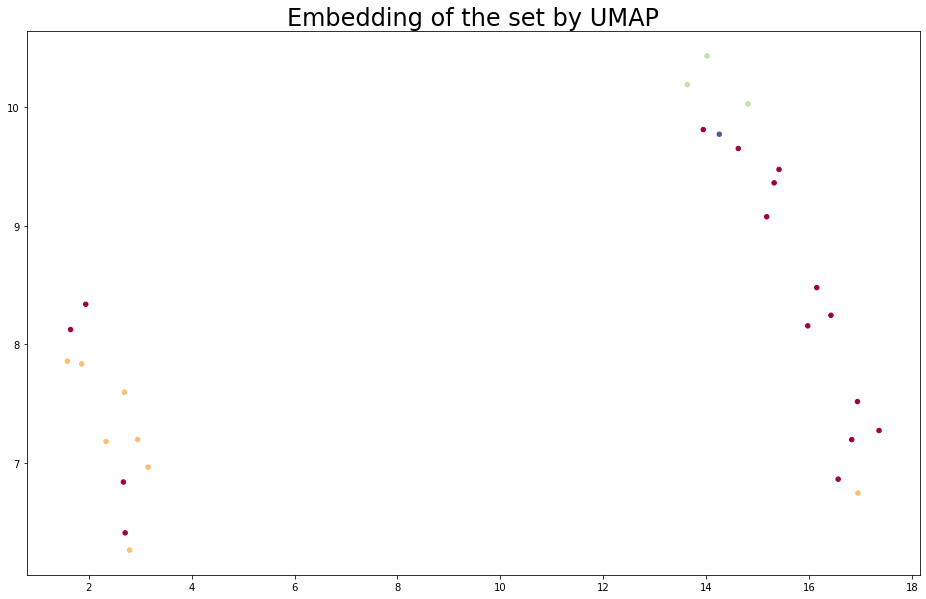

In [44]:
plt.figure(figsize=(16, 10))
plt.scatter(tf.embedding_[:, 0], tf.embedding_[:, 1], s=20, c=bul_with_labs.kmeans4, cmap='Spectral')
plt.title('Embedding of the set by UMAP', fontsize=24)

# with PCA table

In [3]:
pc5_table = pd.read_csv("C:/Users/User/Documents/UNITN/Computational social science/bulgariafirst5PCs.csv")
pc5_table

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5
0,1,-2.910812,-0.805206,-0.434381,-1.319706,0.472919
1,2,-1.570109,-0.856490,1.168204,-0.123753,1.306531
2,3,-1.812574,-0.053273,0.611739,1.080204,-0.256452
3,4,-2.415417,-0.960445,1.258874,-1.558349,0.854457
4,5,-0.756115,-0.876549,1.322428,-0.191210,0.591137
5,6,0.363848,-0.193888,-1.208230,0.721530,-1.143512
6,7,-0.912859,-0.399951,-2.127820,0.228886,0.597717
7,8,-2.478715,-1.169754,1.397699,-2.210572,-0.413593
8,9,-0.272862,-0.353087,-0.769902,0.764761,-0.671634
9,10,-2.716860,-0.995797,0.951578,-1.431625,1.090580


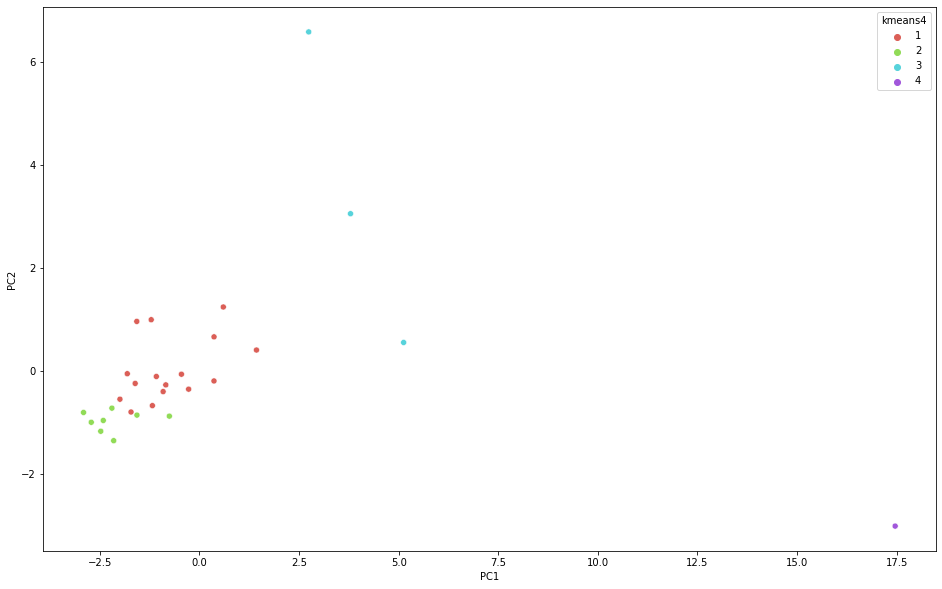

In [6]:
plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="PC1", y="PC2",
    hue=bul_with_labs.kmeans4,
    palette=sns.color_palette("hls", 4),
    data=pc5_table,
    legend="full",
)

plt.show()

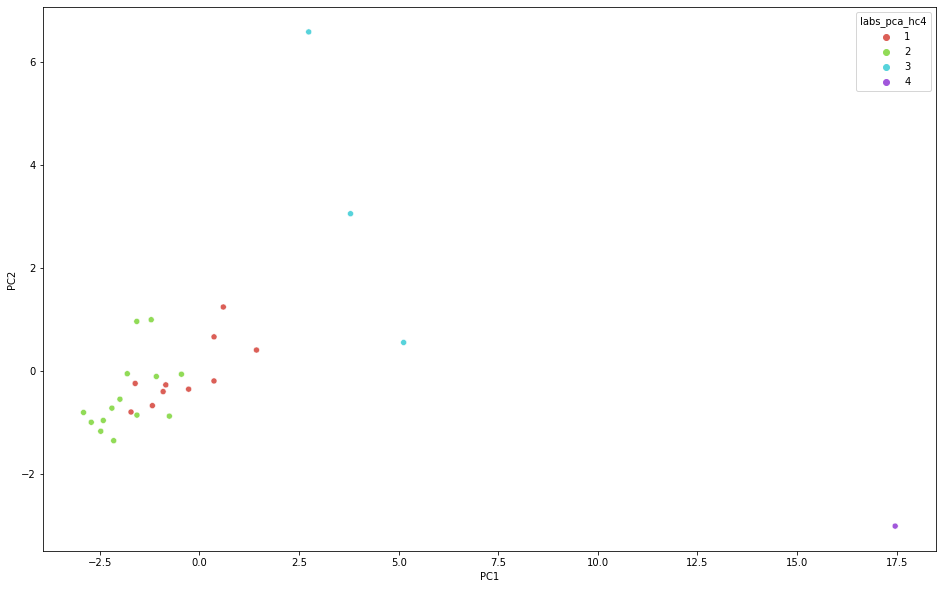

In [7]:
plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="PC1", y="PC2",
    hue=bul_with_labs.labs_pca_hc4,
    palette=sns.color_palette("hls", 4),
    data=pc5_table,
    legend="full",
)

plt.show()